In [15]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image,ImageDraw


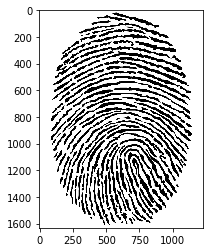

In [3]:
img = cv2.imread("thumb.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')

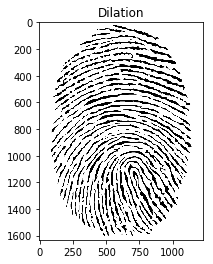

True

In [4]:
kernel = np.ones((5,5), np.uint8)  
img_dilation = cv2.dilate(img, kernel, iterations=1) 

plt.imshow(img_dilation,cmap='gray')
plt.title('Dilation')
plt.show()
cv2.imwrite('task1.png', img_dilation) 

In [2]:
#task 2
#Take image of a handwritten signature and perform the following tasks

#1.	Develop a bounding box around the signature content.
#2.	Find out the centroid of the signature.
#3.	Segment signature from centroid vertically and horizontally (the signature will be divided into four pieces)
#4.	Calculate black to white transitions for each of the four segments.


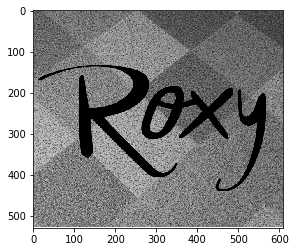

In [6]:
img = cv2.imread("roxy.png",0)
plt.imshow(img,cmap='gray')


Preprocessing
Convert the signature to a binary (black-and-white) image before extracting features.

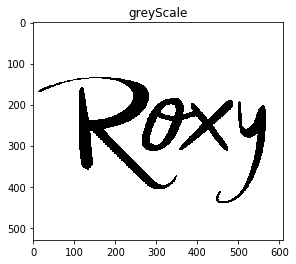

True

In [8]:
ret,thresh1 = cv2.threshold(img,25,120,cv2.THRESH_BINARY)
plt.imshow(thresh1,cmap='gray')
plt.title('greyScale')
plt.show()
cv2.imwrite('greyScaleRoxy.png', thresh1) 

(530, 610)
12 566 133 440
12 566 133 440


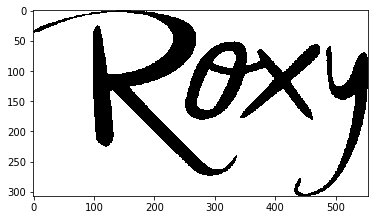

In [74]:
#1.	Develop a bounding box around the signature content.
def boundary(img):
    height, width = img.shape
    img1 = np.zeros(img.shape)
    left = width
    right = 0
    top = height
    bottom = 0
    
    for x in range(height):
        for y in range(width):
            if(img[x][y] == 0):
                
                if(x> right):
                    right = x
                elif(x< left):
                    left =x
                elif (y>bottom):
                    bottom =y
                elif(y < top):
                    top =y
    print(top, bottom ,left, right) 
    return top, bottom, left, right
    return img1

img2 = cv2.imread("greyScaleRoxy.png",0)
print(img2.shape)
top, bottom ,left, right = boundary(img)
boundaryImg = boundary(img2)
cropped_image = img2[133:440, 12:566]

plt.imshow(cropped_image, cmap='gray')

129.01909556720688 298.35152526215444
554 307


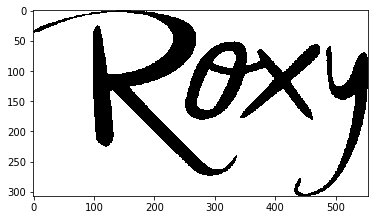

In [75]:
#Locating the centroid

def centroid(img):
    w,h = img.shape
    cx=0
    cy=0
    n=0 
    for x in range(w):
        for y in range(h):
            if(img[x][y] == 0):
                cx = cx + x
                cy = cy + y
                n = n + 1
    cx = cx/n
    cy = cy /n
    print(cx, cy)
    return cx, cy       

img2 = cv2.imread("greyScaleRoxy.png",0)
cx, cy = centroid(cropped_image)


h,w = cropped_image.shape
print (w,h)
plt.imshow(cropped_image, cmap='gray')

True

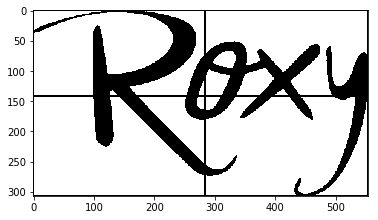

In [76]:
#Dividing the image at centroid to create four segments
image1 = cv2.rectangle(cropped_image, (0, 0), (284, 141), (0,0,0), 2) 
image1 = cv2.rectangle(cropped_image, (284, 0), (w, 141), (0,0,0), 2) 
image1 = cv2.rectangle(cropped_image, (0, 141), (284, h), (0,0,0), 2) 
image1 = cv2.rectangle(cropped_image, (284, 141), (w, h), (0,0,0), 2) 


plt.imshow(image1, cmap='gray')
cv2.imwrite('task2.png', image1) 

In [72]:
#Finding transitions
transitions = [0,0,0,0]
w, h = image1.shape
prev = image1[0][0]
n = 0
for x in range(1, w):
    for y in range(1,h):
        curr = image1[x][y]
        if(curr == 255 & prev == 0):
            n=n+1
        else:
            prev = curr
transitions[i]=n


In [81]:
transitions = [0,0,0,0]
segments = (((0,0),(284, 141)),((284, 0),(w, 141)),((0, 141),(284, h)),((284, 141),(w, h)))
for i in range(len(segments)):
    n=0
    x1 = segments[i][0][0]
    y1 = segments[i][0][1] 
    x2 = segments[i][1][0]
    y2 = segments[i][1][1]
    prev = cropped_image[x1, y1]
    x1 = int(x1) 
    x2 = int(x2)
    y1 = int(y1)
    y2 = int(y2)
    for row in range(x1, x2):
        for col in range(y1, y2):
            curr = cropped_image[col,row]
            if(curr == 255 & prev == 0):
                    n=n+1
            else:
                prev = curr
    transitions[i] = n

print ("Black to white transitions for 4 segments: " + str(transitions))

Black to white transitions for 4 segments: [11226, 10580, 7691, 6284]
